# Terceiro questionamento
## Qual faixa etária teve mais casos “Cura” na evolução do caso? Quais as justificativas para isso?

Sabemos que existem grupos de riscos que são mais afetados pelas doenças e tem uma recuperação mais dificultada. Portanto, por meio dos dados, queremos mostrar se o índice de cura dentre as faixas etária muda, e tambem descobrir qual é a faixa etária em que a cura foi mais presente. Ou seja, será que poderemos afirmar que os jovens têm uma taxa de recuperação maior do que a dos idosos?





## Inicialização

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import matplotlib.ticker as mtick

In [29]:
path = 'dados-es.csv'

df = pd.read_csv(path, delimiter=';', encoding='latin1')

In [30]:
# Ajustes na tabela
df = df.drop(columns=["ÿid"])

In [35]:
sintomas = df['sintomas'].unique()


print(df['sintomas'].str.contains(sintomas[0]).value_counts())
print(sintomas[0])

False    943571
True        122
Name: sintomas, dtype: int64
Tosse, Febre, Dor de Garganta


---
## Análise descritiva

### Analisando campo Idade

In [4]:
# Retirando as linhas cuja idade é null

print("numero de linhas antes: ", df.shape[0])

df = df.dropna(subset=['idade'])

print("numero de linhas depois: ",  df.shape[0])

numero de linhas antes:  949987
numero de linhas depois:  949983


<AxesSubplot:>

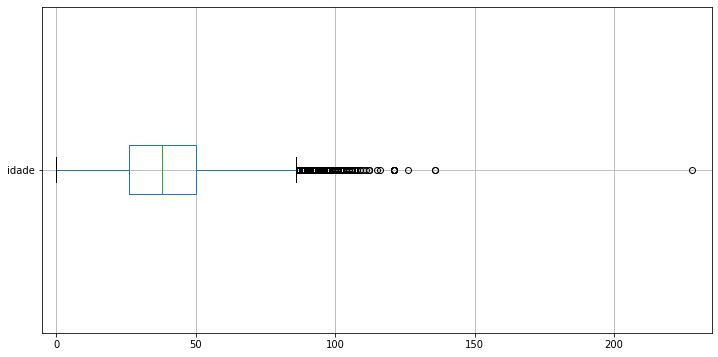

In [6]:
fig, myax = plt.subplots(figsize=(12, 6))
myax.set_xlim([-5, 235])

df.boxplot(column='idade', vert=False, figsize=(6,3), ax=myax)

Como podemos ver, a maioria dos casos tem idade entre 25 e 50 anos, porém, tambem vemos que existem idades exorbitantes como 250 anos. Esses são *outliers*, e devemos remove-los. Aqui vamos considerar idades maiores que 110 *outliers*:

In [9]:
# Retirando linhas cuja idade é maior do que 110

print("numero de linhas antes: ", df.shape[0])

df_rec = df[df['idade']<110]

print("numero de linhas depois: ",  df_rec.shape[0])

numero de linhas antes:  949983
numero de linhas depois:  949962


---

Com isso finalizamos o tratamento da idade, pois agora todos os dados da idade fazem sentido e tambem nao reduzimos drasticamente o tamanho do nosso dataframe, já que continua na cas do 949 mil linhas.

### Avalisando Evolução caso
Agora, iremos nos preocupar em analisar a coluna evoluçãoCaso, porque é nela que contem a informação sobre a cura do paciente.

In [10]:
df['evolucaoCaso'].unique()

array([nan, 'Cura', 'Em tratamento domiciliar', 'Cancelado', 'Ignorado',
       'Internado em UTI', 'Óbito', 'Internado'], dtype=object)

In [11]:
df_rec = df_rec[['idade', 'evolucaoCaso', 'condicoes']]

In [12]:
# Retirando linhas cuja evolução caso é: nan, Cancelado ou Ignorado

print("numero de linhas antes: ",  df_rec.shape[0])

df_rec = df_rec.loc[df_rec['evolucaoCaso'].isin(['Cura', 'Internado', 'Internado em UTI', 'Em tratamento domiciliar', 'Óbito'])]

print("numero de linhas depois: ",  df_rec.shape[0])

numero de linhas antes:  949962
numero de linhas depois:  268228


---

Haviam linhas em que o dado de evolução do caso estava faltando ou dizia 'Cancelado' ou 'Ignorado', esses dados são irrelevantes para nós, pois não dizem nada sobre a cura ou não do paciente, portanto retiramos esses dados. Porem, com isso quase 72% dos dados foram descartados, portanto constata-se que hove muita falta de informação aqui.

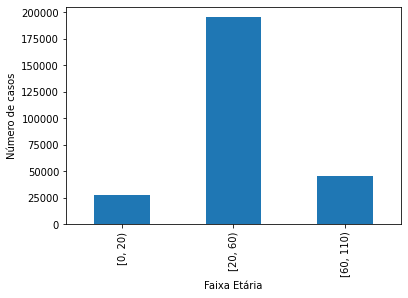

In [13]:
# Calculando numero de curados e numero total de casos por faixa etaria
curados = pd.cut(df_rec.loc[ df_rec['evolucaoCaso']=='Cura' ]['idade'], [0,20,60,110], right=False).value_counts(sort=False)
todos = pd.cut(df_rec['idade'], [0,20,60,110], right=False).value_counts(sort=False)

todos.plot.bar()
plt.ylabel("Número de casos")
plt.xlabel("Faixa Etária")
plt.show()

Dividindo as faixas etarias como:
*   Jovem: 0-19 anos
*   Adulto: 20-59 anos
*   Idoso: 60-110 anos

Assim, percebe-se que realmente a maior parte da população se enquadra na faixa etária adulta




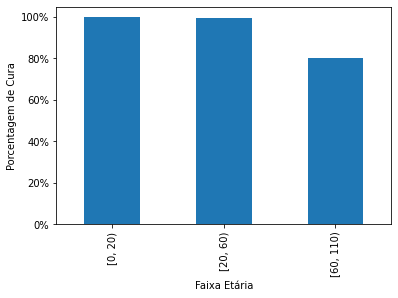

[0, 20)      99.848436
[20, 60)     99.189193
[60, 110)    80.266188
Name: idade, dtype: float64

In [14]:
eixo = (curados*100/todos).plot.bar()
eixo.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Porcentagem de Cura")
plt.xlabel("Faixa Etária")

plt.show()


curados*100/todos

---
Então, o gráfico anterior representa a porcentagem de curados de cada faixa etária. Com isso, percebe-se que inesperadamente os valores desse índice de cura é exageradamente alto, chegando a mais de 99% nos jovens e adultos, sendo assim, vemos que os dados podem estar mostrando uma estatística diferente da realidade, e uma justificativa para isso seja a falta de informação presente de alguns pacientes que não alega-se nada a respeito a evolução do caso, como foi dito antes.

Porém, desconsiderando esses fatos, a analise final é que a taxa de cura dos idosos é a menor com quase 80% e conclui-se que a maior taxa de cura é a dos jovens chegando a 99,8%

### Justificativa

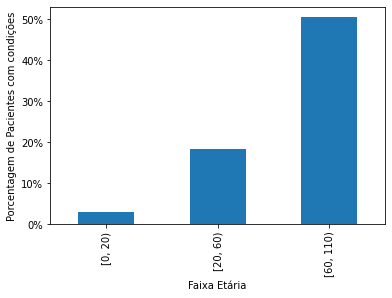

[0, 20)       3.049331
[20, 60)     18.421282
[60, 110)    50.564709
Name: idade, dtype: float64


In [15]:
# Obtendo a taxa de pacientes com condicoes

df_condicoes = df_rec.dropna(subset=['condicoes'])
condicoes_c = pd.cut(df_condicoes['idade'], [0,20,60,110], right=False).value_counts(sort=False)

eixo = (condicoes_c*100/todos).plot.bar()
eixo.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Porcentagem de Pacientes com condições")
plt.xlabel("Faixa Etária")

plt.show()


print(condicoes_c*100/todos)

---
Agora buscamos justificar o porquê a faixa etária dos jovens é a com mais taxa de cura. Analisando os dados, percebe-se que uma coluna que pode ter relação com isso é a coluna das condições, a qual diz se o paciente tem alguma condição especial de saúde, como uma doença crônica por exemplo. Analisando esse dado montamos o gráfico acima, que confirma que os idosos tem muita mais chance de conter condições especiais, e também, justifica em partes a maior taxa de cura por parte dos jovens, pois nessa faixa etária apenas 3% dos pacientes tem alguma condição especial.

## Análise inferencial

Uma hipótese que havemos de testar é se as taxas de curas são iguais para as diferentes faixas etárias, pois isso nos mostraria que os dados realmente são inconclusivos. Isso se deve ao fato de que se as taxas de cura forem iguais, não poderiamos afirmar qual faixa etária tem a maior taxa de cura.

Para testar isso, usaremos o teste qui-quadrado para as proporções, pois dessa forma poderemos calcular a frequência esperada e comparar com as frequências obtidas anteriormente. Dessa forma, devemos usar as hipoteses H0 e Ha como sendo:

*  H0: as proporções são iguais
*  Ha: as proporções são diferentes

Lembrando tambem que usaremos um alfa de 5%.

In [18]:
import scipy.stats as stats

# Teste qui-quadrado para comparar proporções de duas populações
obs = np.column_stack([curados.to_list(), todos.to_list()])
aux = stats.chi2_contingency(obs)

print(aux)
print("\n\np-valor = ",aux[1] )

(771.1668123549935, 3.493448808346989e-168, 2, array([[ 27135.21964409,  28244.78035591],
       [190670.73134456, 198467.26865544],
       [ 39885.04901135,  41515.95098865]]))


p-valor =  3.493448808346989e-168


---
Então, apos realizar o teste qui-quadrado, obtemos um p-valor muito proximo de zero, sendo assim, aceitamos a hipotese Ha -> as proporções são diferentes. Então, apesar do que foi dito anteriormente que as proporções são muito parecidas, na verdade podemos sim afirmar que as taxas são distintas umas das outras e os dados realmente expressam que os jovens são mais suscetíveis a cura.

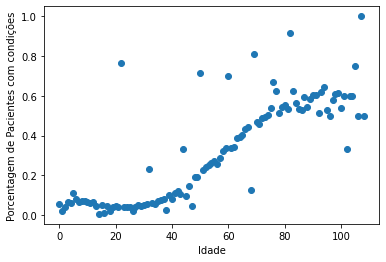

In [19]:
# Exibindo o gráfico idade x porcentagens de condições

pd.set_option('display.max_rows', None)

df_condicoes = df_rec.dropna(subset=['condicoes'])
condicoes_c = pd.cut(df_condicoes['idade'], np.arange(0,111), right=False).value_counts(sort=False)

todos = pd.cut(df_rec['idade'], np.arange(0,111), right=False).value_counts(sort=False)

plt.plot(np.arange(0,110), (condicoes_c/todos).to_list(), 'o')
plt.xlabel("Idade")
plt.ylabel("Porcentagem de Pacientes com condições")
plt.show()

Agora, testaremos se a idade esta relacionada com a taxa de condições especiais médicas dos pacientes, e para isso usaremos o teste do coeficiente de Pearson. O motivo de usar esse teste é porque ele nos auxilia a dizer se existe alguma correlação entre as duas variaveis, e como podemos ver no gráfico, parece que existe essa tendência, mas também existem muitos pontos fora de controle, por isso usaremos o teste de hipótese para conferir essas ideias.

In [20]:
aux = stats.pearsonr(np.arange(0,109), (condicoes_c/todos).to_list()[:109])

print(aux, "\n\np-valor = ", aux[1])

(0.8417713861117185, 2.0477426528579136e-30) 

p-valor =  2.0477426528579136e-30


---
Realizando o teste, percebe-se que realmente existe essa correlação que estavamos esperando - já que o p-valor é muito proximo de zero, e esse valor indica o qual é a chance de termos duas variávies independetes - ou seja, conforme a idade cresce, a proporção de pacientes com condições especiais de saúde também aumenta. Sendo assim, confirmamos cada vez mais o raciocinio anterior de que os jovens tem a maior taxa de cura,pois nessa etapa conferimos que nossa justificativa é válida e que a nossa hipótese era correta.


---
### Conclusão

Ao fim de nossos estudos descobrimos que a faixa etária que tem a maior taxa de cura são os jovens. No entanto, vimos que há muita falta de informação, já que perdemos muitos dados porque a coluna de evolução do caso tem muitas informações faltantes, chegando a cerca de 72% dos dados descartados.

Mesmo assim, conforme o senso comum e os dados de diferentes outras doenças, tem-se que essa decisão faz sentido, e vimos também que a taxa de condições especiais de saúde que tornam o paciente mais "frágil" são maiores na faixa etária dos idosos. Então, realmente verifica-se a faixa etária jovem tem a maior taxa de recuperação do covid-19.